# Financial wellness analysis
## Preparation of the data


Before anything, I start by importing the librairies I could need below.

In [18]:
#Import necessary librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
pd.options.mode.chained_assignment = None  


I can now import the data from the url into a Pandas dataframe and get a glimpse. 

In [19]:
#Import data from csv file into a pandas dataframe 
url='https://raw.githubusercontent.com/moneyhub/data-scientist-tech-exercise/main/user_category_amount.csv'
df=pd.read_csv(url,sep=",")
display(df.head())

user_id    category  total    month
0  0354794f53a874c16eef7a10a67f8b96e47ec454  automotive -13.12  2021-03
1  0354794f53a874c16eef7a10a67f8b96e47ec454  automotive -13.12  2021-04
2  0354794f53a874c16eef7a10a67f8b96e47ec454  automotive -13.12  2021-05
3  0354794f53a874c16eef7a10a67f8b96e47ec454       cable -36.53  2021-03
4  0354794f53a874c16eef7a10a67f8b96e47ec454       cable -36.53  2021-04

How many different users do we have?

In [20]:
df.user_id.value_counts()
df.user_id.nunique()

100

Our data sample includes 100 users.

The format is not ideal to get insights so I will pivot the dataframe in order to get on a row the incomes and spends of a given user in a given month.

In [21]:
df1=df.pivot(index=['user_id','month'] ,columns='category',values='total')
display(df1.head())

category                                          automotive  cable  child  \
user_id                                  month                               
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03      -13.12 -36.53    NaN   
                                         2021-04      -13.12 -36.53    NaN   
                                         2021-05      -13.12 -36.53    NaN   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03         NaN    NaN    NaN   
                                         2021-04         NaN    NaN    NaN   

category                                          education  groceries  \
user_id                                  month                           
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03        NaN    -589.78   
                                         2021-04        NaN    -457.03   
                                         2021-05        NaN    -399.64   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03        NaN    -521.97   
                                         2021-04        NaN    -595.59   

category                                          healthcare  insurance  \
user_id                                  month                            
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03         NaN     -36.03   
                                         2021-04         NaN     -36.03   
                                         2021-05         NaN     -36.03   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03         NaN     -19.27   
                                         2021-04         NaN     -19.27   

category                                          investment   loans  \
user_id                                  month                         
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03         NaN -145.41   
                                         2021-04         NaN -145.41   
                                         2021-05         NaN -145.41   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03         NaN     NaN   
                                         2021-04         NaN     NaN   

category                                          mortgages  other-income  \
user_id                                  month                              
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03    -460.02           NaN   
                                         2021-04    -460.02           NaN   
                                         2021-05    -460.02           NaN   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03   -1128.53           NaN   
                                         2021-04   -1128.53           NaN   

category                                          paychecks  rent  \
user_id                                  month                      
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03   2553.000   NaN   
                                         2021-04   2553.000   NaN   
                                         2021-05   2553.000   NaN   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03   5537.305   NaN   
                                         2021-04   5537.305   NaN   

category                                          restaurants  retirement  \
user_id                                  month                              
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03       -18.32         NaN   
                                         2021-04       -58.41         NaN   
                                         2021-05       -77.12         NaN   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03       -93.18         NaN   
                                         2021-04      -138.78         NaN   

category                                          service  taxes  telephone  \
user_id                                  month                                
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03    -1.14  -96.0      -44.0   
                                         2021-04    -1.14  -96.0      -44.0   
                       

Let check the informations of the dataframe.

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 300 entries, ('0354794f53a874c16eef7a10a67f8b96e47ec454', '2021-03') to ('f931d574523248dfcff32e04e560f943783bc072', '2021-05')
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   automotive    105 non-null    float64
 1   cable         249 non-null    float64
 2   child         36 non-null     float64
 3   education     24 non-null     float64
 4   groceries     300 non-null    float64
 5   healthcare    72 non-null     float64
 6   insurance     165 non-null    float64
 7   investment    9 non-null      float64
 8   loans         117 non-null    float64
 9   mortgages     183 non-null    float64
 10  other-income  96 non-null     float64
 11  paychecks     294 non-null    float64
 12  rent          42 non-null     float64
 13  restaurants   300 non-null    float64
 14  retirement    30 non-null     float64
 15  service       183 non-null    float64
 16  taxes     

From the overview and the .info() method, we can see that there are lots of missing values. However, it does not seem to be disturbing that not all users have spends in every categories. 

Let's further investigate with the .describe() method.

In [23]:
df1.describe()

category  automotive       cable       child   education    groceries  \
count     105.000000  249.000000   36.000000    24.00000   300.000000   
mean     -164.820571  -53.540555 -319.179167  -194.56625  -457.719967   
std       200.037667   39.102890  269.418593   381.79989   293.310637   
min      -603.840000 -174.520000 -900.000000 -1840.52000 -1488.760000   
25%      -231.390000  -81.500000 -555.970000  -214.39750  -633.985000   
50%       -46.730000  -43.120000 -185.545000   -47.06000  -376.190000   
75%       -23.540000  -19.360000 -136.090000   -25.10750  -239.957500   
max        -0.870000   -3.000000   -5.000000    -5.29000    -9.670000   

category  healthcare   insurance   investment        loans    mortgages  \
count      72.000000  165.000000     9.000000   117.000000   183.000000   
mean      -31.682083  -53.894545   566.666667  -274.940513  -947.491370   
std        33.534310   47.065650  1362.672007   217.095859   648.834077   
min      -140.000000 -206.350000 -1250.000000 -1113.150000 -3444.530000   
25%       -39.030000  -75.420000 -1250.000000  -345.300000 -1172.230000   
50%       -19.900000  -38.970000  1450.000000  -265.400000  -824.300000   
75%       -10.590000  -17.990000  1500.000000  -130.480000  -530.150000   
max        -7.940000   -4.370000  1500.000000    -9.750000   -23.560000   

category  other-income    paychecks         rent  restaurants   retirement  \
count        96.000000   294.000000    42.000000   300.000000    30.000000   
mean        393.016390  3572.467846  -673.515714  -220.485867  1474.685000   
std         661.811254  1703.654313   843.251514   214.392694  1264.609787   
min           1.550000   656.400000 -2125.000000 -1474.620000   281.420000   
25%           5.247500  2235.320000 -1270.000000  -285.247500   652.720000   
50%          90.650000  3413.995000  -505.000000  -159.750000   887.455000   
75%         513.842500  4631.490000  -137.800000   -80.052500  1634.270000   
max        3084.940000  9534.890000   825.000000    -1.490000  4280.720000   

category     service       taxes   telephone   utilities  
count     183.000000  129.000000  237.000000  300.000000  
mean      -14.042623 -175.871860  -40.026203 -137.824600  
std        20.244639   93.934532   37.514167   95.025176  
min      -146.030000 -342.000000 -207.510000 -483.000000  
25%       -17.000000 -229.700000  -54.410000 -192.500000  
50%        -8.000000 -174.000000  -30.000000 -107.580000  
75%        -4.000000 -131.180000  -14.000000  -70.400000  
max        -0.230000  233.930000   -4.740000   -3.500000

By carefully looking at the min and max values of the operations of each category, we obtained some inconsistencies. For example, positive values in rent, taxes indicates that in these cases, they are not spends but incomes and should be recategorized accordingly in the other-income column. On the other hand, we will split the investment values, negative ones considered as savings will stay in the column and the positive ones considered as income will be moved to other-income. 


In [24]:
for c in ['rent','investment','taxes']:
    id=df1[df1[c]>0].index
    df1.loc[id,'other-income']+=df1[df1[c]>0][c]
    df1.loc[id,c]=0 

Finally, we calculate the amount of money saved by summing up all the spends and incomes on a row, namely by a user in a month.

In [25]:
df1['saving']=df1.sum(axis=1)
# display(df1.head())

## 50%-30%-20% recommendation

In order to check the recommended scheme of spending 50% on essential, 30% on wants and 20% on savings, we can split the categories into larger categories. Of course, determining what is essential or not is subjective. 

In [26]:
df1.columns

Index(['automotive', 'cable', 'child', 'education', 'groceries', 'healthcare',
       'insurance', 'investment', 'loans', 'mortgages', 'other-income',
       'paychecks', 'rent', 'restaurants', 'retirement', 'service', 'taxes',
       'telephone', 'utilities', 'saving'],
      dtype='object', name='category')

In [27]:
# Categorizing the subcategories as essential, wants, savings or income
essential=['automotive','child','education','groceries','healthcare','insurance','loans','mortgages','rent','service','taxes','utilities']
wants=['restaurants','cable','telephone']
savings=['saving','investment']
income=['paychecks','other-income','retirement']
# Summing up the spends for each category
df1['wants']=df1[wants].sum(axis=1)
df1['essential']=df1[essential].sum(axis=1)
df1['savings']=df1[savings].sum(axis=1)
df1['income']=df1[income].sum(axis=1)
display(df1.head())

category                                          automotive  cable  child  \
user_id                                  month                               
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03      -13.12 -36.53    NaN   
                                         2021-04      -13.12 -36.53    NaN   
                                         2021-05      -13.12 -36.53    NaN   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03         NaN    NaN    NaN   
                                         2021-04         NaN    NaN    NaN   

category                                          education  groceries  \
user_id                                  month                           
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03        NaN    -589.78   
                                         2021-04        NaN    -457.03   
                                         2021-05        NaN    -399.64   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03        NaN    -521.97   
                                         2021-04        NaN    -595.59   

category                                          healthcare  insurance  \
user_id                                  month                            
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03         NaN     -36.03   
                                         2021-04         NaN     -36.03   
                                         2021-05         NaN     -36.03   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03         NaN     -19.27   
                                         2021-04         NaN     -19.27   

category                                          investment   loans  \
user_id                                  month                         
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03         NaN -145.41   
                                         2021-04         NaN -145.41   
                                         2021-05         NaN -145.41   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03         NaN     NaN   
                                         2021-04         NaN     NaN   

category                                          mortgages  ...  retirement  \
user_id                                  month               ...               
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03    -460.02  ...         NaN   
                                         2021-04    -460.02  ...         NaN   
                                         2021-05    -460.02  ...         NaN   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03   -1128.53  ...         NaN   
                                         2021-04   -1128.53  ...         NaN   

category                                          service  taxes  telephone  \
user_id                                  month                                
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03    -1.14  -96.0      -44.0   
                                         2021-04    -1.14  -96.0      -44.0   
                                         2021-05    -1.14  -96.0      -44.0   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03      NaN    NaN      -20.0   
                                         2021-04      NaN    NaN      -20.0   

category                                          utilities    saving   wants  \
user_id                                  month                                  
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03      -56.0  1056.650  -98.85   
                                         2021-04      -56.0  1149.310 -138.94   
                                         2021-05      -56.0  1187.990 -157.65   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03     -187.0  3567.355 -113.18   
                                         2021-04     -187.0  3448.135 -158.78   

category                                          essential   savings  \
user_id                                  month                          
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03   -1397.50  1056.650   
 

For the sake of clearness, we will keep only the large categories columns.

In [28]:
dfc=df1[['wants','essential','savings','income']]
# display(dfc.head())

To get the share of income spent on each category, we rescale the values by dividing by the total income value.

In [29]:
#Rescaling the spends to get them as percentage of the income
for c in ['wants','essential','savings']:
    dfc[c]=dfc[c]/dfc['income']
display(dfc.head())

category                                             wants  essential  \
user_id                                  month                          
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03 -0.038719  -0.547395   
                                         2021-04 -0.054422  -0.495398   
                                         2021-05 -0.061751  -0.472918   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03 -0.020440  -0.335320   
                                         2021-04 -0.028675  -0.348615   

category                                           savings    income  
user_id                                  month                        
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03  0.413886  2553.000  
                                         2021-04  0.450180  2553.000  
                                         2021-05  0.465331  2553.000  
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03  0.644240  5537.305  
                                         2021-04  0.622710  5537.305

We check if the users satisfy the scheme for financial wellness. A boolean value is defined in a new column. We sum the values of this column to see the number of rows satisfying the rule. 

In [30]:
dfc['check']=(dfc['essential'].abs()<0.5) & (dfc['wants'].abs()<0.3) & (dfc['savings']>0.2)
dfc['check'].sum()
display(dfc.head())

category                                             wants  essential  \
user_id                                  month                          
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03 -0.038719  -0.547395   
                                         2021-04 -0.054422  -0.495398   
                                         2021-05 -0.061751  -0.472918   
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03 -0.020440  -0.335320   
                                         2021-04 -0.028675  -0.348615   

category                                           savings    income  check  
user_id                                  month                               
0354794f53a874c16eef7a10a67f8b96e47ec454 2021-03  0.413886  2553.000  False  
                                         2021-04  0.450180  2553.000   True  
                                         2021-05  0.465331  2553.000   True  
051b40d545a7e3ff3133892e46821d73ce5a677b 2021-03  0.644240  5537.305   True  
                                         2021-04  0.622710  5537.305   True

In our sample of 3 months for 100 users, 176 months fulfilled the three conditions. Is there a condition more difficult to fulfill?  

In [14]:
dfc['check1']=dfc['essential'].abs()<0.5
dfc['check2']=dfc['wants'].abs()<0.3 
dfc['check3']=dfc['savings']>0.2
print(dfc['check1'].sum(),dfc['check2'].sum(),dfc['check3'].sum())

177 290 251


#(The saving condition is the least fulfilled condition in our sample.) 

Keeping the essential spendings below 50% of the income is the least fulfilled condition in our sample.

Our sample is quite small only 100 users and 3 months per each user, we can't draw conclusions on the general population. However, we look at the average distribution of spendings for the users of our sample. 

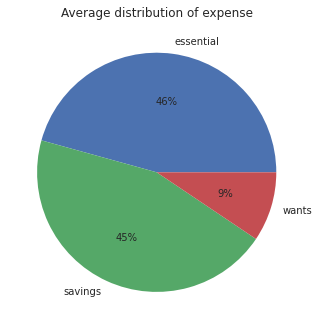

In [15]:
dfagg=dfc[['essential','savings','wants']].agg('mean').to_frame().abs()
dfagg=dfagg.reset_index()
# display(dfagg)
plt.style.use('seaborn')
plt.pie(dfagg[0],labels=dfagg['category'],normalize=True, autopct='%.0f%%')
plt.title('Average distribution of expense')
plt.show()

In average, the recommended rule is observed. 

## Analysis of a given user's expenses

To help users to manage their spends, we want to plot a pie chart of their spends in each category. We write a function that takes the user id and the month to be considered as arguments and return a nice plot.  

In [16]:
dfs=df1.drop(['paychecks','other-income','income','savings','wants','essential','retirement'],axis=1)
# display(dfs.head(15))
def pieplot(id,mth):
# Creating a figure with 2 subplots    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    plt.style.use('seaborn')
#     inc=df1.loc[(id,mth),'income']
    df=dfs.loc[(id,mth)].to_frame()
    df=abs(df).reset_index().dropna()
    df.columns = df.columns.droplevel(0)
    df.columns=['cat','spends']
# Map the subcategories to greater category.    
    df['gcat']=df['cat'].map({'automotive':'essential','cable':'wants', 'child':'essential', 'education':'essential', 'groceries':'essential', 'healthcare':'essential',
       'insurance':'essential', 'investment':'savings', 'loans':'essential', 'mortgages':'essential', 
        'rent':'essential', 'restaurants':'wants', 'service':'essential', 'taxes':'essential',
       'telephone':'wants', 'utilities':'essential', 'saving':'savings' })
# Aim: sorting the rows by category, subcategory (to have them grouped for the pie plot), then by magnitude of the spends.    
    df=df.set_index(['gcat','cat']).sort_index().reset_index()
    df=df.sort_values(['gcat','spends'], ascending = [True, False])
#     display(df.head(15))
# Taking the length of each category
    es=df[df['gcat']=='essential'].shape[0]
    sa=df[df['gcat']=='savings'].shape[0]
    wa=df[df['gcat']=='wants'].shape[0]
# Choosing the colormap for each category    
    e,s,w=[plt.cm.Blues, plt.cm.YlGn, plt.cm.YlOrRd]
    color=[]
# Creating arrays of various shades for each subcategory    
    ess=[e(.9),e(.8),e(.7),e(.6),e(.5),e(.4),e(.35),e(.3),e(.25),e(.2),e(.15),e(.1)]
    sav=[s(.4),s(.2),s(.1)]
    wan=[w(.8),w(.6),w(.4),w(.2),w(.1)] 
# Based on the # of subcategories in each category, appending color shades.    
    for i in range(es):
        color.append(ess[i])
    for i in range(sa):
        color.append(sav[i])
    for i in range(wa):
        color.append(wan[i])  
    ax1.pie(df['spends'],labels=df['cat'], colors=color, radius=1.8, autopct='%.0f%%',textprops={'fontsize': 14})
    ax2.pie(df.groupby('gcat')['spends'].sum(), colors=[e(0.8),s(0.5),w(0.85)] , labels=['essential','savings','wants'], radius=1.8, autopct='%.0f%%',textprops={'fontsize': 14})
    fig.tight_layout()
    fig.suptitle('Distribution of expenses of user per subcategory and corresponding main categories.', fontsize=16)
    plt.show()
  

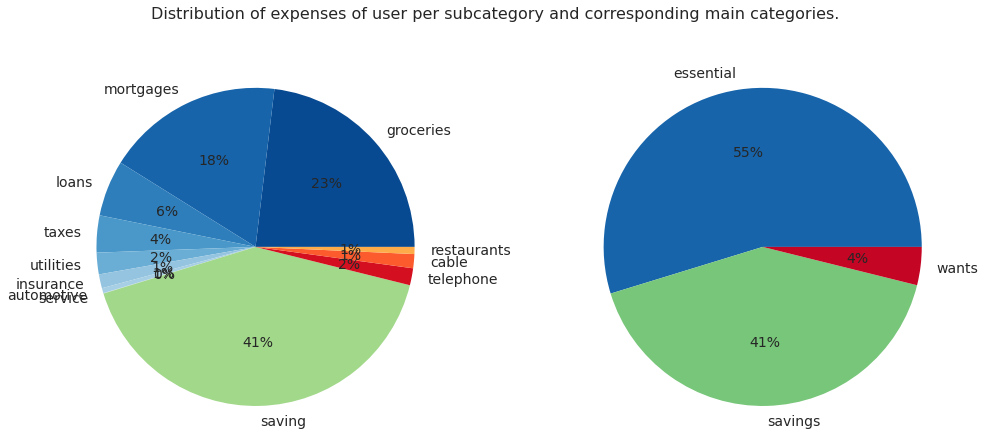

In [17]:
pieplot('0354794f53a874c16eef7a10a67f8b96e47ec454','2021-03')